# Section 1
# Data Setup and Initial Exploration

Below I set up the dataset using Path from pathlib library to avoid headaches,
after loading the dataset under student_df I use .head() & .info()

### Observations:

We have a cross-sectional dataset of student housing. There are 4000 individual entries, one per room.  
Although the statistical units are rooms, there are entries that belong to the same property.
We can see that the unique count on 'property_id' is 888, meaning that there is data from rooms belonging to 888 properties
We have 15 columns, where the main variables under study are a mix between numerical and qualitative variables. 

The main purpose is to assess the characteristics of student housing, hopefully with the purpose to 'rank them'

##### Categorical/Qualitative variables:
city_area, living_room (has one or not) , furnished (yes/no), commute_mode (transport method)

##### Numerical/Quantitative variables:
num_bedrooms, bathrooms, rent_monthly, deposit_amount, distance_km_to_campus, commute_time_min, max_occupants,  property_condition

###### *excluding indexing/identying columns: room_id, property_id, address


At a first glance, we can see that there is a large number of qualitative variables that can bring issues due to typos, and there are some outliers (impossible values) in the numerical data.
Apart from that, clear issues on some numerical data being stores as strings, in addittion to prefixes and suffixes





In [1]:
# Imports and dataset setup

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


BASE_DIR = Path(r"C:/Users/prida/Desktop/ST238 Project")  # paste dir to folder w/ datasets here
student_path = BASE_DIR / "student_housing_dirty.csv"
student_df = pd.read_csv(student_path)
display(student_df.head(10))
display(student_df.info())
print(f'number of properties surveyed: {student_df['property_id'].nunique()}')
student_df.describe()

,room_id,property_id,address,city_area,num_bedrooms,bathrooms,living_room,furnished,rent_monthly,deposit_amount,distance_km_to_campus,commute_time_min,commute_mode,max_occupants,property_condition
0,R200000,P1175,9758 Elm St,Old Town,7,3,yes,no,1090,1530,1.62,4,bus,9,2
1,R200001,P1196,8114 Willow Ln,Old Town,3,3,yes,yes,750,830,1.25,5,bus,3,3
2,R200002,P1537,1209 Spruce Dr,North Campus,5,3,yes,yes,900,1150,1.84,31,walk,6,3
3,R200003,P1502,1550 Willow Ln,Old Town,6,3,yes,no,1000,1380,2.61,42,walk,7,2
4,R200004,P1579,8804 Spruce Dr,North Campus,4,3,yes,yes,1090,930,4.51,57,walk,4,4
5,R200005,P1211,9944 Elm St,South Campus,7,3,yes,partial,1160,1450,5.32,25,bike,9,2
6,R200006,P1615,1644 Oak Ave,Old Town,4,3,yes,no,910,790,4.99,20,bike,6,5
7,R200007,P1348,3811 Elm St,Old Town,6,3,yes,yes,970,1310,1.17,14,walk,6,4
8,R200008,P1185,8365 Cedar Blvd,South Campus,4,3,no,partial,850,930,2.21,13,bike,5,4
9,R200009,P1398,7573 Spruce Dr,City Center,5,3,yes,yes,1220,1210,3.39,12,bike,6,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   room_id                4000 non-null   object
 1   property_id            4000 non-null   object
 2   address                3988 non-null   object
 3   city_area              3988 non-null   object
 4   num_bedrooms           4000 non-null   int64 
 5   bathrooms              4000 non-null   int64 
 6   living_room            4000 non-null   object
 7   furnished              3988 non-null   object
 8   rent_monthly           4000 non-null   object
 9   deposit_amount         4000 non-null   int64 
 10  distance_km_to_campus  4000 non-null   object
 11  commute_time_min       4000 non-null   object
 12  commute_mode           3988 non-null   object
 13  max_occupants          4000 non-null   int64 
 14  property_condition     4000 non-null   object
dtypes: int64(4), object(1

None

number of properties surveyed: 888


,num_bedrooms,bathrooms,deposit_amount,max_occupants
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.541250,2.874000,1081.887500,5.365000
std,1.703092,0.331891,324.538971,4.582251
min,2.000000,2.000000,-1630.000000,0.000000
25%,3.000000,3.000000,860.000000,4.000000
50%,5.000000,3.000000,1060.000000,5.000000
75%,6.000000,3.000000,1270.000000,7.000000
max,7.000000,3.000000,2300.000000,99.000000


# 

# Missing Values
### From the above, we can see we have a few columns with missing values

These are: 'address', 'city_area', 'furnished', 'commute_mode'. 
4 out of the 15 columns, and they share the exact same quantity (12 out of 4000) of missing values. 
to confirm, I run .isnull().sum() on the dataframe.

Given the exact match of missing values (all of these vars have 12 missing values):

  - I want to first inspect all these entries to discard if there are only 12 rows with NaN/NA values (which would make it straight-forward)

I then run code to see how many missing values there are per row: 
  - 46 of them have only 1, while one of them has 2, for a grand total of 47 rows with missing values. 



### What can we do in the presence of missing data?

1) replace the missing values with the mean of the not null values (as it would not affect the mean, but make the other datapoints of that observation usable
2) Correct the data with some logical interpretation in the case of outliers / clear typos / impossible cases 
3) Delete the observations (losing sample size / statistical power)
4) Make assumptions


### In this case I would do the following:

1) Delete all rows where 'address' is a missing value
   - We simply cannot guess, and there is no such thing as a mean addresss
2) Delete all rows where 'city_area' is a missing value
   - I guess we would work out the area based on the address in a real world and more complex scenario
3) All rows in which 'furnished' is missing would be taken as not furnished
   - This is an assumption I am comfortable with making, since Furnished (yes/no) can be interpreted as 'mark only if furnished'
4) All rows in which (distance_km_to_campus/ commute_time_min) >= 10 will be filled as 'walk' for the 'commute_mode' variable.
   - I cannot really work out if people take the bus or train based on speed, but I can certainly work out if they walk given their speed. 
   - I assume a 10 min/km and above to be a walking pace, the analysis then supports this claim 
5) Rows in which 'commute_mode' (after (4) is applied) is missing will be deleted. A more complex (and way longer) way would be to use KNN and use a combination of city_area, commute_time_min, and distance_km_to_campus to figure out the 'commute_mode', but that is a bit out of scope.
    - Again, I guess that under a more complex situation we can use address and city_area to work out the commute_mode, comparing it *literally* with the nearest neighbours



In [2]:
missing_rows = student_df[student_df.isnull().any(axis=1)]          ## Dataframe with rows that have one or more missing values
print(f' total number of rows with at least one missing value: {len(missing_rows)}') # Number of above
display(missing_rows.head (12))           # Just to inspect
missing_values_per_row = missing_rows.isnull().sum(axis=1).value_counts()  # Get how many missing values per row there are to discard initial hypothesis

 total number of rows with at least one missing value: 47


,room_id,property_id,address,city_area,num_bedrooms,bathrooms,living_room,furnished,rent_monthly,deposit_amount,distance_km_to_campus,commute_time_min,commute_mode,max_occupants,property_condition
118,R200118,P1215,NaN,City Center,5,3,yes,partial,1000,860,1.99,8,bus,5,2
175,R200175,P1774,4892 Spruce Dr,Riverside,6,3,yes,yes,1050,1070,0.89,3,NaN,6,2
223,R200223,P1287,6669 Elm St,NaN,6,3,yes,partial,1070,1240,2.16,10,bus,8,5
253,R200253,P1231,1425 Oak Ave,NaN,3,3,yes,yes,800,1070,5.26,23,bus,4,3
359,R200359,P1380,3015 Oak Ave,NaN,2,2,yes,yes,650,810,1.28,3,train,3,4
391,R200391,P1749,NaN,Old Town,7,3,yes,yes,1020,940,2.29,7,bus,7,3
556,R200556,P1392,4477 Oak Ave,South Campus,3,3,no,NaN,700,580,3.65,12,bus,0,2
563,R200563,P1056,5176 Spruce Dr,NaN,6,3,yes,yes,960,1270,1.58,5,bus,6,5
709,R200709,P1694,6440 Elm St,City Center,5,3,yes,partial,1220,1320,2.44,7,NaN,7,1
718,R200718,P1567,NaN,Tech Park,7,3,yes,yes,1270,1340,1.69,3,train,7,2


In [3]:
## Procedure to clean data 
cleaning_df = student_df.copy()       # Copy just to avoid headaches
cleaning_df.dropna(subset=['address', 'city_area'],inplace=True)    # Step 1) and 2) Drop rows with missing address and/or city area
cleaning_df.loc[cleaning_df['furnished'].isnull(), 'furnished'] = 'no'       # Step 3) Fill missing furnished with 'no' (assumption)    


         
      
# When trying to do step 4, I run into errors since numerical entries are strings, apart from that, some of them have units like 'km' next to them that dont allow for simple conversion
# Therefore I will first do the Text Inconsistencies section

# FAILED CODE (due to 'km' being next to some distances)
      #cleaning_df['distance_km_to_campus'] = pd.to_numeric(cleaning_df['distance_km_to_campus'], errors='coerce')
      #cleaning_df['commute_time_min'] = pd.to_numeric(cleaning_df['commute_time_min'], errors='coerce')

      #walkers = cleaning_df[(cleaning_df['commute_time_min']/cleaning_df['distance_km_to_campus']) >= 10]

print("Missing values per column:\n\n", student_df.isnull().sum())
print ('--------------------------------------')


Missing values per column:

 room_id                   0
property_id               0
address                  12
city_area                12
num_bedrooms              0
bathrooms                 0
living_room               0
furnished                12
rent_monthly              0
deposit_amount            0
distance_km_to_campus     0
commute_time_min          0
commute_mode             12
max_occupants             0
property_condition        0
dtype: int64
--------------------------------------


## Text Inconsistencies

As seen when .info() was run, there a lot of 'object' data types  


#### Observations: 

- num_bedrooms, bathrooms, rent_monthly, deposit_amount, distance_km_to_campus, commute_time_min, max_occupants, property_condition **should all be *int/float* instead of object**
- living_room can be mapped as a boolean
- the presence of 'partial' as answers in furnished throw out the possibility of mapping to a boolean while preserving all observations, alternative can be 0 to 1 with partial being 0.5 
- many numerical variables that are strings present difficulties like the answer to distance_km_to_campus having 'km' in some answers.

I am first going to deal with qualitative and  small range numerical variables.

#### Procedure:

1) Check Unique values to identify typos / upper lower case mismatches
2) Create mapping functions
3) Apply the maps (I used replace instead of map to avoid having to map all possible values)
4) Cleaning up the max occupants variable



In [4]:
def unique_values_check (var):
    
    print (f'Unique values for {var}:')
    print (cleaning_df[var].unique())
    print ('------------')

## Unique value checks
unique_values_check('living_room')
unique_values_check('furnished')
unique_values_check('commute_mode')
unique_values_check('property_condition')
unique_values_check('city_area')
unique_values_check('num_bedrooms')
unique_values_check('bathrooms')
unique_values_check('max_occupants')

# Mapping variables
living_room_map = {'yes': True, 'no': False, 'y': True, 'noo' : False}
furnished_map =  { 'Part' : 'partial', 'No' : 'no' , 'YES' : 'yes'}
commute_mode_map = {'walkk' : 'walk', 'BUS' : 'bus', 'Bike': 'bike', 'Train': 'train'}
property_condition_map = {'good' : 4}
# No typos/irregularities on city_area, num_bedrooms, bathrooms

# Applying mappings
cleaning_df['living_room'] = cleaning_df['living_room'].replace(living_room_map)
cleaning_df['furnished'] = cleaning_df['furnished'].replace(furnished_map)
cleaning_df['commute_mode'] = cleaning_df['commute_mode'].replace(commute_mode_map)
cleaning_df['property_condition'] = cleaning_df['property_condition'].replace(property_condition_map)


# Cleaning 'max_occupants' column

cleaning_df['max_occupants'].value_counts()  # We can see that only 8 people entered '99' and 8 people entered '0'ArithmeticError

cleaning_df.loc[cleaning_df['max_occupants'] == 99] # There is no clear pattern on these entries. I will replace them with their mean (without the 99s and 0s)
cleaning_df.loc[cleaning_df['max_occupants'] == 0]  # No clear pattern either, will replace with mean as well (excluding 90s and 0s)

max_occupants_clean_mean = cleaning_df[(cleaning_df['max_occupants'] != 99) & (cleaning_df['max_occupants'] != 0)]['max_occupants'].mean() # Clean mean without 99s and 0s

cleaning_df['max_occupants'] = pd.to_numeric(cleaning_df['max_occupants'], errors='coerce')  # Converting to float, so I can store the mean as a float to not bias the data
cleaning_df.loc[cleaning_df['max_occupants'] == 99, 'max_occupants'] = max_occupants_clean_mean          # Replacing 99s with clean mean
cleaning_df.loc[cleaning_df['max_occupants'] == 0, 'max_occupants'] = max_occupants_clean_mean        # Replacing 0s with clean mean



Unique values for living_room:
['yes' 'no' 'noo' 'y']
------------
Unique values for furnished:
['no' 'yes' 'partial' 'Part' 'No' 'YES']
------------
Unique values for commute_mode:
['bus' 'walk' 'bike' 'train' 'BUS' 'walkk' nan 'Bike' 'Train']
------------
Unique values for property_condition:
['2' '3' '4' '5' '1' 'good']
------------
Unique values for city_area:
['Old Town' 'North Campus' 'South Campus' 'City Center' 'Riverside'
 'Tech Park' 'Hilltop']
------------
Unique values for num_bedrooms:
[7 3 5 6 4 2]
------------
Unique values for bathrooms:
[3 2]
------------
Unique values for max_occupants:
[ 9  3  6  7  4  5  2 99  8  0]
------------


C:\Users\prida\AppData\Local\Temp\ipykernel_13120\2064619545.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaning_df['living_room'] = cleaning_df['living_room'].replace(living_room_map)
C:\Users\prida\AppData\Local\Temp\ipykernel_13120\2064619545.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.185353535353535' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaning_df.loc[cleaning_df['max_occupants'] == 99, 'max_occupants'] = max_occupants_clean_mean          # Replacing 99s with clean mean


In [5]:
# Diagnostics and final touches to qualitative / small range variables

cleaning_df['living_room'] = cleaning_df['living_room'].astype(bool)
cleaning_df['furnished'] = cleaning_df['furnished'].astype('category')
cleaning_df['commute_mode'] = cleaning_df['commute_mode'].astype('category')
cleaning_df['property_condition'] = cleaning_df['property_condition'].astype(int)
cleaning_df['city_area'] = cleaning_df['city_area'].astype('category')
cleaning_df['num_bedrooms'] = cleaning_df['num_bedrooms'].astype(int)
cleaning_df['bathrooms'] = cleaning_df['bathrooms'].astype(int)

unique_values_check('living_room')
unique_values_check('furnished')
unique_values_check('commute_mode')
unique_values_check('property_condition')



Unique values for living_room:
[ True False]
------------
Unique values for furnished:
['no', 'yes', 'partial']
Categories (3, object): ['no', 'partial', 'yes']
------------
Unique values for commute_mode:
['bus', 'walk', 'bike', 'train', NaN]
Categories (4, object): ['bike', 'bus', 'train', 'walk']
------------
Unique values for property_condition:
[2 3 4 5 1]
------------


## Text Inconsistencies Continued: Numerical vars

I now will tackle the numerical variables incorrectly saved as strings and/or that present issues:  

'rent_monthly' , 'deposit_amount', 'distance_km_to_campus', 'commute_time_min'


### Issues along the whole text inconsistencies process:

Well, I am going to list the issues and the solutions I found to many problems in bullets instead of a paragraph for everyone's wellbeing.

1) When using .map() to apply the mappings, I wiped out all data since I did not include all the keys (just the one that were incorrectly inputted)
   - Solution: I reverted back to the clean copy I saved and used .replace()

2) I tried simple conversion using pd.to_numeric, thanks to the prefixes and suffixes, it failed miserably
    - Solution: In the cell below I tackle those issues by inspecting and replacing these pre and suffixes
3) Negative values
    - Solution: straight-forward fix, I took the absolute value.

3) Impossible values
    - Solution: Finding logical alternatives (negative to positive for example), inserting means, or dropping rows if no pattern was found

4) Outliers
    - Solution: Means mostly, some logic as done for the row with a 194 minute commute, which seems to be legit (walking a long time). However I dropped it since it skews our scoring.


#### Procedure:

With the help of the for loop I constructed, we can take a look at the unique entries for each variable.  

I will quickly convert negative deposit amounts to positive (impossible + taking advantange it is already a float)

I will then deal with the string prefixes and suffixes ('xx' , 'km', 'mins'), then convert to numbers

finally check for any outliers


In [6]:
numeric_issues = ['rent_monthly' , 'deposit_amount', 'distance_km_to_campus', 'commute_time_min']


for var in numeric_issues:

   print (f'{var} is {type(cleaning_df[var].iloc[0])}')
   display (cleaning_df[var].unique())


# Fixing deposit_amount negative values

cleaning_df.loc[cleaning_df['deposit_amount'] < 0, 'deposit_amount'] = cleaning_df['deposit_amount'].abs()  # Replacing negative deposits with their absolute value


# Next step is to clean these numerical issues
cleaning_df['rent_monthly'] = cleaning_df['rent_monthly'].str.replace('xx', '')                   
cleaning_df['rent_monthly'] = cleaning_df['rent_monthly'].str.replace('x', '')

cleaning_df['distance_km_to_campus'] = cleaning_df['distance_km_to_campus'].str.replace('km', '')
cleaning_df['commute_time_min'] = cleaning_df['commute_time_min'].str.replace('mins', '')


cleaning_df['rent_monthly'] = pd.to_numeric(cleaning_df['rent_monthly'], errors='raise')
cleaning_df['distance_km_to_campus'] = pd.to_numeric(cleaning_df['distance_km_to_campus'], errors='raise')
cleaning_df['commute_time_min'] = pd.to_numeric(cleaning_df['commute_time_min'], errors='raise')

# Fixing deposit_amount negative values
cleaning_df.loc[cleaning_df['distance_km_to_campus'] < 0, 'distance_km_to_campus'] = cleaning_df['distance_km_to_campus'].abs()



rent_monthly is <class 'str'>


array(['1090', '750', '900', '1000', '1160', '910', '970', '850', '1220',
       '670', '920', '710', '820', '1390', '860', '930', '830', '1030',
       '1020', '800', '1260', '660', '980', '1340', '840', '620', '730',
       '780', '1420', '1110', '1300', '760', '1350', '1190', '640',
       '1200', '810', '1280', '1150', '1330', '740', '1410', '700',
       '1250', '1480', '720', '1040', '1050', '950', 'xx820', '1210',
       '1010', '1170', '990', '880', '1360', '630', '590', '770', '580',
       '1470', '1460', '610', '790', '540', '890', '560', '1180', '1060',
       '960', '1080', '1100', '1120', '550', '1230', '1130', '1290',
       '1070', '1520', '1590', '690', '1450', '870', '1490', '1240',
       '1140', '940', '680', '1370', '570', '1320', 'xx840', '600', '650',
       'xx910', '1310', '1270', '1560', '510', '1400', '1530', 'xx810',
       '1540', 'xx800', 'xx790', '1380', 'xx1070', '1430', '530', 'xx760',
       'xx550', 'xx1050', '520', 'xx940', 'xx1200', 'xx1370', 'xx104

deposit_amount is <class 'numpy.int64'>


array([ 1530,   830,  1150,  1380,   930,  1450,   790,  1310,  1210,
         640,   780,  1390,  1190,  1260,  1230,   880,  1120,   850,
         810,   710,   910,  1220,  1500,  1040,  1460,  1050,   890,
        1200,  1940,  1340,  1160,   860,   540,  1000,  1830,  1100,
         980,   870,  1250,  1270,   620,  2020,   650,  1550,  1010,
        1130,   690,   750,   570,  1850,  1480,  1720,  1700,  1640,
         770,  1080,  1370,  1110,  1170,  1470,   840,  1180,   630,
        1440,   730,  1090,  1750,   960,   760,  1540,  1350,   740,
        1400,   820,  1140,  1240,  1950,  1290,   940,  1730,  1620,
         900,   720,  1030,  1430,   680,   990,  1020, -1200,   560,
        1070,   970,  1420,   800,  1760,  1060,  1490,  1680,  1360,
        1280,  1610,   950,   490,  1710,  1510,  1320,   700,  1330,
        1770,  1580,  1630,  1300,   440,   660,  2050,  1410,  1800,
         580,   550,  1820,   920,  1910,   600,  1670,   590,  1590,
        1520,  2030,

distance_km_to_campus is <class 'str'>


array(['1.62', '1.25', '1.84', '2.61', '4.51', '5.32', '4.99', '1.17',
       '2.21', '3.39', '0.63', '0.96', '1.72', '1.54', '4.29', '1.12',
       '3.05', '0.43', '1.81', '1.33', '0.76', '1.88', '6.38', '0.99',
       '2.27', '3.94', '0.55', '8.25', '2.63', '1.35', '2.38', '2.9',
       '2.75', '0.56', '5.76', '3.74', '1.01', '1.44', '0.92', '1.58',
       '4.31', '2.45', '3.55', '1.85', '3.36', '1.46', '1.27', '2.57',
       '2.26', '4.11', '1.52', '2.85', '1.13', '2.58', '3.27', '2.39',
       '0.71', '0.87', '2.64', '2.46', '7.19', '1.75', '6.36', '2.13',
       '5', '1.26', '1.47', '1.83', '7.73', '3.43', '2.51', '5.18',
       '3.13', '2.88', '4.36', '2.69', '3.51', '2.24', '2.09', '1.43',
       '0.61', '6.83', '1.71', '1.3', '0.82', '0.25', '2.19', '2.08',
       '1.65', '3.77', '2.83', '0.5', '1.07', '3.72', '1.69', '0.39',
       '4.03', '1.86', '3.6', '7.89', '0.31', '3.03', '0.24', '0.81',
       '3.83', '1.14', '2.54', '3.67', '5.1', '4.05', '1.15', '2.67',
       '3.84',

commute_time_min is <class 'str'>


array(['4', '5', '31', '42', '57', '25', '20', '14', '13', '12', '8', '3',
       '7', '52', '6', '24', '32', '43', '39', '48', '82', '17', '9',
       '10', '11', '18', '44', '35', '89', '101', '15', '50', '72', '37',
       '22', '21', '28', '26', '33', '54', '16', '75', '53', '29', '106',
       '68', '78', '63', '109', '36', '51', '69', '34', '30', '23', '45',
       '38', '73', '49', '19', '64', '46', '41', '59', '27', '71', '93',
       '47', '107', '113', '84', '105', '132', '87', '90', '58', '102',
       '65', '55', '40', '140', '79', '62', '61', '14 mins', '123', '0',
       '77', '56', '70', '52 mins', '99', '114', '13 mins', '120', '97',
       '7 mins', '110', '100', '74', '96', '67', '12 mins', '66', '80',
       '28 mins', '83', '18 mins', '60', '78 mins', '11 mins', '3 mins',
       '112', '85', '81', '150', '91', '76', '31 mins', '95', '115',
       '108', '131', '157', '86', '133', '191 mins', '56 mins', '94',
       '124', '194', '98', '141', '17 mins', '125', '23 mi

In [7]:
# Bringing back the failed attempt to fill NaN values for commute_mode based on speed...

walkers = cleaning_df[(cleaning_df['commute_time_min']/cleaning_df['distance_km_to_campus']) >= 10]

display(walkers['commute_mode'].value_counts()) ## We can see that with the above treshold (~ slower than 10 min/km) we get mostly walkers

# Therefore, i will fill NaN commute_mode with 'walk' when this treshold is met:

cleaning_df.loc[(cleaning_df['commute_mode'].isnull()) & ((cleaning_df['commute_time_min']/cleaning_df['distance_km_to_campus']) >= 10), 'commute_mode'] = 'walk'

# And then then I will fill the rest of the NaN with the second most common mode of commute, which is 'bus'. 
cleaning_df.loc[cleaning_df['commute_mode'].isnull(), 'commute_mode'] = 'bus'


# General diagnostics to see proper conversions
display(cleaning_df.describe())

## Checking if entry with 194 min commute was logical, it checks out, but....
cleaning_df.loc[cleaning_df['commute_time_min'] == 194]
walker_index = cleaning_df.loc[cleaning_df['commute_time_min'] == 194].index
cleaning_df.drop(index= walker_index, inplace = True)  # Dropping this outlier siunce it skews our commuting score.
## Checking if entry with 0 min commute was logical, it does not check out.
cleaning_df.loc[cleaning_df['commute_time_min'] == 0]

# Given that there is no way to have a 0 min commute, I will replace it with the (clean) mean commute time as there is no clear pattern (that would not take a lot of time)
commute_time_clean_mean = cleaning_df[cleaning_df['commute_time_min'] != 0]['commute_time_min'].mean() # Clean mean without 0s
cleaning_df.loc[cleaning_df['commute_time_min'] == 0, 'commute_time_min'] = commute_time_clean_mean

## final shape

cleaning_df.info()

commute_mode
walk     1377
bus        32
bike       23
train      14
Name: count, dtype: int64

,num_bedrooms,bathrooms,rent_monthly,deposit_amount,distance_km_to_campus,commute_time_min,max_occupants,property_condition
count,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000
mean,4.538481,2.873742,945.862676,1088.523642,2.403571,18.416751,5.185354,3.190141
std,1.703575,0.332181,201.035333,302.431669,1.687997,20.460660,1.835633,1.104622
min,2.000000,2.000000,510.000000,440.000000,0.100000,0.000000,2.000000,1.000000
25%,3.000000,3.000000,800.000000,870.000000,1.140000,5.000000,4.000000,2.000000
50%,5.000000,3.000000,930.000000,1060.000000,2.010000,11.000000,5.000000,3.000000
75%,6.000000,3.000000,1080.000000,1270.000000,3.290000,22.000000,7.000000,4.000000
max,7.000000,3.000000,1590.000000,2300.000000,11.630000,194.000000,9.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   room_id                3975 non-null   object  
 1   property_id            3975 non-null   object  
 2   address                3975 non-null   object  
 3   city_area              3975 non-null   category
 4   num_bedrooms           3975 non-null   int64   
 5   bathrooms              3975 non-null   int64   
 6   living_room            3975 non-null   bool    
 7   furnished              3975 non-null   category
 8   rent_monthly           3975 non-null   int64   
 9   deposit_amount         3975 non-null   int64   
 10  distance_km_to_campus  3975 non-null   float64 
 11  commute_time_min       3975 non-null   float64 
 12  commute_mode           3975 non-null   category
 13  max_occupants          3975 non-null   float64 
 14  property_condition     3975 non-null   int64 

C:\Users\prida\AppData\Local\Temp\ipykernel_13120\2072519148.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '18.41891551071879' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaning_df.loc[cleaning_df['commute_time_min'] == 0, 'commute_time_min'] = commute_time_clean_mean


## Data Manipulation 

#### The Rent Distribution

  - We correctly scaled the rent between 0 and 1 (0 = house with lowest rent, 1 = house with highest rent), but we should have inversed it like we did for commute_score.
  - This causes higher rents to have higher scores
      - Solution: I used (1 - rent_scaled) for the scoring function, so we can tie lower rents with more desirable houses



#### Commute_score

  - The lower the commute time, the higher the score
  - 1 represents the house with the lowest commute time, 0 represents the house with the highest commute time. 
      -  This is why I dropped the 194 minute walker, since it skews our scoring due to his choice to walk (could have taken the bus/train)


#### Space density and general score

  - Space density was fairly straight forwards

  - General scoring has some issues / overlooks some data. I talk about in the next markdown cell



Procedure: 

1) Creating the variable to scale rent distribution between 0 an 1
2) Creating commute_score to normalize the commute_time_min variable
3) Creating a variable that represents the space density as a ratio of the number of bedrooms and the number of occupants
4) Creating a variable representing a general score for each house based on the engineered futures using the weights: Normalized rent = 0.4, Space per occupant 0.3, Commute score 0.3.
5) my own house scoring

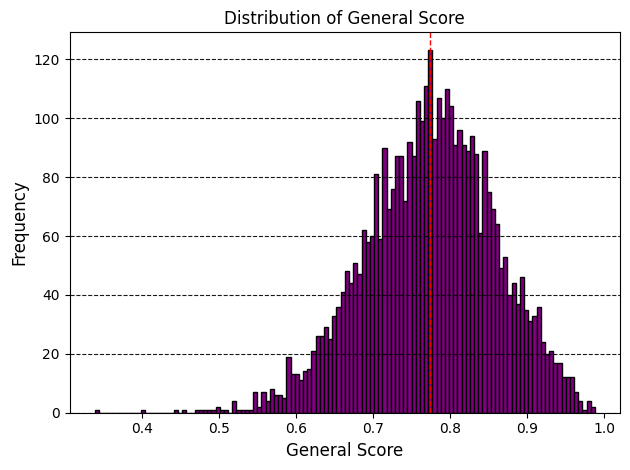

count    3975.000000
mean        0.773769
std         0.084302
min         0.338624
25%         0.717604
50%         0.776556
75%         0.831879
max         0.987881
Name: general_score, dtype: float64

In [8]:
# Step 1, rent scaling

data_df = cleaning_df.copy()
rent_min, rent_max = data_df['rent_monthly'].min(), data_df['rent_monthly'].max()
data_df['rent_scaled'] = (data_df['rent_monthly'] - rent_min) / (rent_max - rent_min)
data_df['rent_scaled'].describe()

# Step 2, commute score

commute_time_max = data_df['commute_time_min'].max()
data_df['commute_score'] = 1 - (data_df['commute_time_min'] / commute_time_max)

# Step 3, space density

data_df['space_per_occupant'] = data_df['num_bedrooms'] / data_df['max_occupants']


# Step 4, general score
data_df['general_score'] = ((1-data_df['rent_scaled']) * 0.4) + (data_df['space_per_occupant'] * 0.3) + (data_df['commute_score'] * 0.3)
# ** Note: I use (1 - rent) since we want a higher score for a cheapear rent, the other variables are ok, higher scores in them are positive (more space, less commute time)**
#  i.e we scaled when in reality we should have normalized like we did in commute score


#Plotting and descriptive stats.
plt.hist(data_df['general_score'], bins=120, edgecolor='black', color = 'purple')
plt.title('Distribution of General Score') 
plt.xlabel('General Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.9, color = 'black')
plt.axvline(data_df['general_score'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

data_df['general_score'].describe()

## Own House Score

I think the previous weights are sensible, but they skip and do not take advantage of the data I fought hard to clean upm  
therefore I am going to make my own score and compare it with the general score next.


### Particular issues with general score:

- Should Invert rent
- Uses commute time instead of (or in addition to) distance to campus
- does not take into account living room, furnished, the house condition, or bathroom ratios, 


### Procedure for own house score:

- I downweight the commute time, but I do not eliminate it since it might reflect connectivity (buses, trains)
- I create and add a normalized version of distance to campus
- I create and add a scaled living room score, and a furnished score
- I create and add the scaled condition score
- I create and add the bathroom to bedroom ratio 


- I then plot the distribution and also plot a scatterplot with a regression line


#### Observations:

- This new score is not as generous with the scoring, although similar, the mass you can see above the 0.9 level is way lower than the old score
- It might be useful to truly find those 'treasure' houses

C:\Users\prida\AppData\Local\Temp\ipykernel_13120\2624065752.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['living_room_score'] = data_df['living_room'].replace(living_room_map_v2)
C:\Users\prida\AppData\Local\Temp\ipykernel_13120\2624065752.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['furnished_score'] = data_df['furnished'].replace(furnished_map_v2)
C:\Users\prida\AppData\Local\Temp\ipykernel_13120\2624065752.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with Categorica

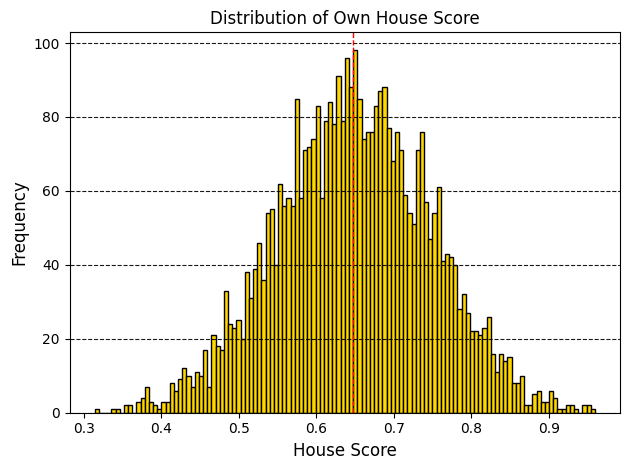

count    3975.000000
mean        0.647865
std         0.099491
min         0.313880
25%         0.579642
50%         0.647937
75%         0.715669
max         0.959574
Name: own_house_score, dtype: float64

In [9]:
living_room_map_v2 = {True: 1, False: 0}
data_df['living_room_score'] = data_df['living_room'].replace(living_room_map_v2)
data_df['living_room_score'] = pd.to_numeric(data_df['living_room_score'], errors='raise')

furnished_map_v2 = {'yes': 1, 'partial': 0.5, 'no': 0}
data_df['furnished_score'] = data_df['furnished'].replace(furnished_map_v2)
data_df['furnished_score'] = pd.to_numeric(data_df['furnished_score'], errors='raise')

data_df['distance_normalized'] = 1 - (data_df['distance_km_to_campus'] / data_df['distance_km_to_campus'].max())

data_df['condition_scaled'] = (data_df['property_condition'] - 1) / 4

bath_bed_ratio = data_df['bathrooms'] / data_df['num_bedrooms']
data_df['bath_bed_minmax'] = (bath_bed_ratio - bath_bed_ratio.min()) / (bath_bed_ratio.max() - bath_bed_ratio.min())

## Creating the function


data_df['own_house_score'] = (
                                (1- data_df['rent_scaled']) * 0.3 +
                                data_df['commute_score'] * 0.05 +
                                data_df['distance_normalized'] * 0.10 +
                                data_df['space_per_occupant'] * 0.15 +
                                data_df['bath_bed_minmax'] * 0.15 +
                                data_df['living_room_score'] * 0.10 +
                                data_df['furnished_score'] * 0.05 +
                                data_df['condition_scaled'] * 0.1
                              )



#Plotting and descriptive stats.
plt.hist(data_df['own_house_score'], bins=120, edgecolor='black', color = 'gold')
plt.title('Distribution of Own House Score') 
plt.xlabel('House Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.9, color = 'black')
plt.axvline(data_df['own_house_score'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

data_df['own_house_score'].describe()

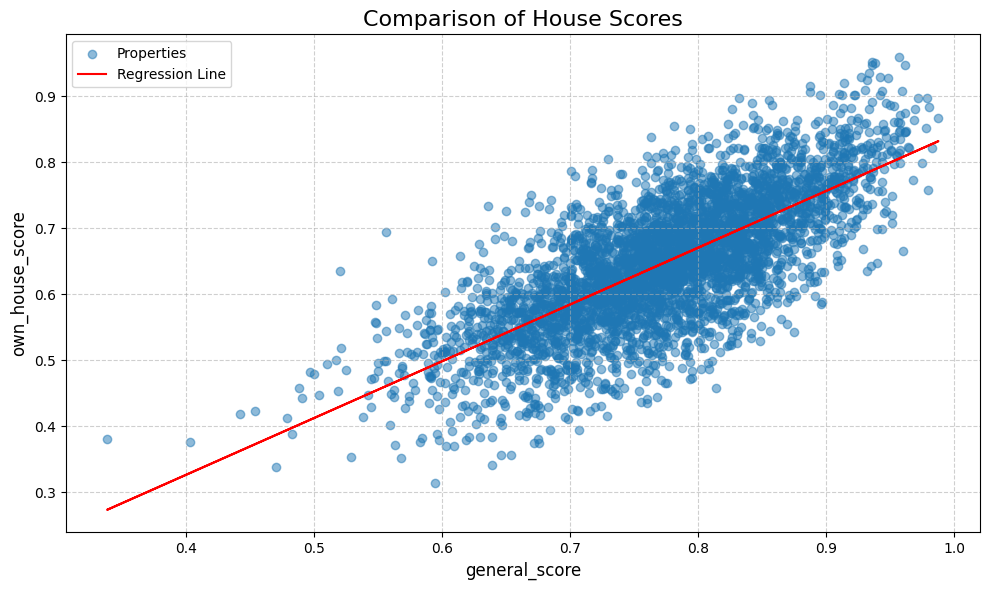

In [10]:
# Linear regression between general score and own house score


lin_reg = stats.linregress(data_df['general_score'], data_df['own_house_score'])
line_y = lin_reg.slope * data_df['general_score'] + lin_reg.intercept

plt.figure(figsize=(10, 6))
plt.scatter(data_df['general_score'], data_df['own_house_score'], alpha=0.5, label='Properties')
plt.plot(data_df['general_score'], line_y, color='red', label='Regression Line')
plt.title('Comparison of House Scores', fontsize=16)
plt.xlabel('general_score', fontsize=12)
plt.ylabel('own_house_score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
     

In [11]:
cleaning_df.loc[cleaning_df['commute_time_min'] == 194].index

Index([], dtype='int64')